# 层次聚类（Hierarchical clustering）
---

In [86]:
set.seed(42)
library(stats)
library(dummy)
library(tidyverse)
library(dendextend)
library(purrr)
library(cluster)

In [87]:
dt <- read.csv("../data/CVD_cleaned/CVD_cleaned.csv") %>% sample_n(size=100,replace=F)
head(dt)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,170,72.57,25.06,Yes,4,60,30,2
2,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,60-64,170,68.04,23.49,Yes,0,60,16,2
3,Excellent,5 or more years ago,Yes,No,No,No,No,No,No,Male,35-39,180,86.18,26.50,No,0,60,30,2
4,Very Good,Within the past year,Yes,No,No,No,No,Yes,Yes,Male,55-59,191,108.41,29.87,No,0,5,3,4
5,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,165,90.72,33.28,No,0,20,20,20
6,Excellent,Within the past year,No,Yes,No,No,No,No,No,Male,60-64,170,90.72,31.32,No,0,30,0,1


**聚类分析必须进行标准化**  
如果不标准化可能会导致某一个指标影响过度

In [88]:
dt_num <- dt %>% select(where(is.numeric))
dt_str <- dt %>% select(where(is.character))
dt_str <- dt_str %>% dummy() %>% mutate_all(as.numeric)
dt_dummy <- cbind(dt_str,dt_num)
head(dt_dummy)
scale_dt_dummy <- scale(dt_dummy) %>% na.omit()
head(scale_dt_dummy)

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Age_Category_80.,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,170,72.57,25.06,4,60,30,2
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,170,68.04,23.49,0,60,16,2
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,180,86.18,26.50,0,60,30,2
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,191,108.41,29.87,0,5,3,4
5,0,0,0,0,1,0,0,0,0,1,...,0,1,0,165,90.72,33.28,0,20,20,20
6,1,0,0,0,0,0,0,0,0,1,...,0,1,0,170,90.72,31.32,0,30,0,1


General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Age_Category_80.,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,-1.1935804,1.1935804,-0.1063235,-0.50204436,-0.5716398,-0.1860641,1.18713209,1.0089834,-0.5075936
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,-1.1935804,1.1935804,-0.1063235,-0.68170144,-0.8066484,-0.6264526,1.18713209,0.1086795,-0.5075936
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,3.6266868,-0.1,-0.4179783,-0.1749816,-1.6785983,...,-0.3316625,0.8294372,-0.8294372,0.7871515,0.03772005,-0.3560905,-0.6264526,1.18713209,1.0089834,-0.5075936
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,1.7699740,0.91934848,0.1483548,-0.6264526,-1.03369325,-0.7273169,-0.2658823
-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,-0.5530610,0.21777372,0.6587876,-0.6264526,-0.42801361,0.3659092,1.6678074
2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-0.3316625,0.8294372,-0.8294372,-0.1063235,0.21777372,0.3654010,-0.6264526,-0.02422719,-0.9202391,-0.6284492


**这种混合数据其实是不适合用euclidean距离的**  
但是姑且随便试试

In [89]:
dist_dt <- dist(scale_dt_dummy,method="euclidean")
dist_dt

            1         2         3         4         5         6         7
2    6.280200                                                            
3    7.713005  9.077089                                                  
4   11.280792 10.142170 11.508620                                        
5    7.409477  7.139839  8.982100 10.494897                              
6    8.215021  8.472915  8.757585 11.411621  8.942749                    
7    9.369847  9.353365 12.162229 11.938387 11.050067 11.279235          
8   10.116715  9.843450 10.525169 13.283288  9.715324 11.814581 11.709395
9    6.330361  4.294935  8.194638 10.052868  5.641169  7.223120 10.225642
10   5.369846  8.140864  8.547155 11.790512  7.909816  6.262951 10.602586
11  10.839270 10.940383 11.742240 10.793970 11.192074  8.878089 10.625235
12   6.206970  8.717986  8.801731 11.272953  8.826291  6.106178 10.956460
13   8.355209  8.430189 10.471251 11.144691  9.729954  8.468117  9.569543
14   7.439097  7.071625  9.154736 11.2

将所有人分成4个组，所以cutree里面k填4  
生成好之后会按数据框的行的顺序生成一列vector，用mutate填进去就行了

In [90]:
hc_dt <- hclust(dist_dt,method="complete")
cluster_k4 <- cutree(hc_dt,k=4)
cluster_k4
cluster_dt <- mutate(dt,cluster=cluster_k4)
head(cluster_dt)

[1] 1 2 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 3 1 1 2 2 2 1
 [38] 2 1 1 2 1 1 2 1 1 1 2 2 4 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 [75] 1 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_.cm.,Weight_.kg.,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,70-74,170,72.57,25.06,Yes,4,60,30,2,1
2,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,60-64,170,68.04,23.49,Yes,0,60,16,2,2
3,Excellent,5 or more years ago,Yes,No,No,No,No,No,No,Male,35-39,180,86.18,26.50,No,0,60,30,2,1
4,Very Good,Within the past year,Yes,No,No,No,No,Yes,Yes,Male,55-59,191,108.41,29.87,No,0,5,3,4,2
5,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,165,90.72,33.28,No,0,20,20,20,1
6,Excellent,Within the past year,No,Yes,No,No,No,No,No,Male,60-64,170,90.72,31.32,No,0,30,0,1,1


正常的聚类图直接把hclust得到的结果plot就能画了

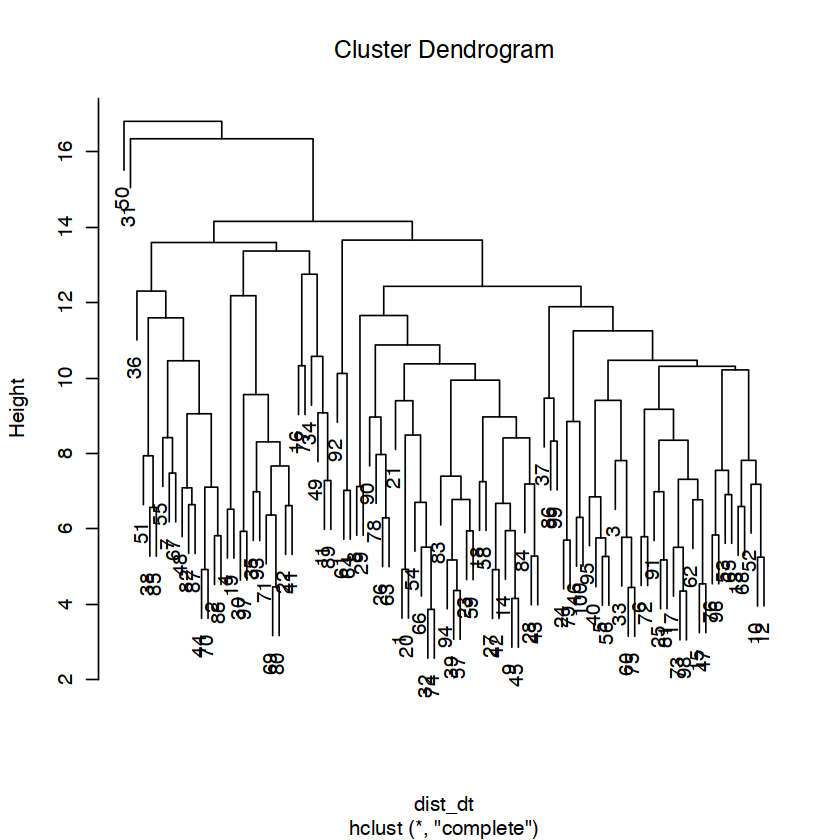

In [91]:
plot(hc_dt)

用颜色标出来的话，要用到dendextend包  
比如分成4个组的话，color_branches的k填4  
也可以指定h来分组（一般用k就行了）

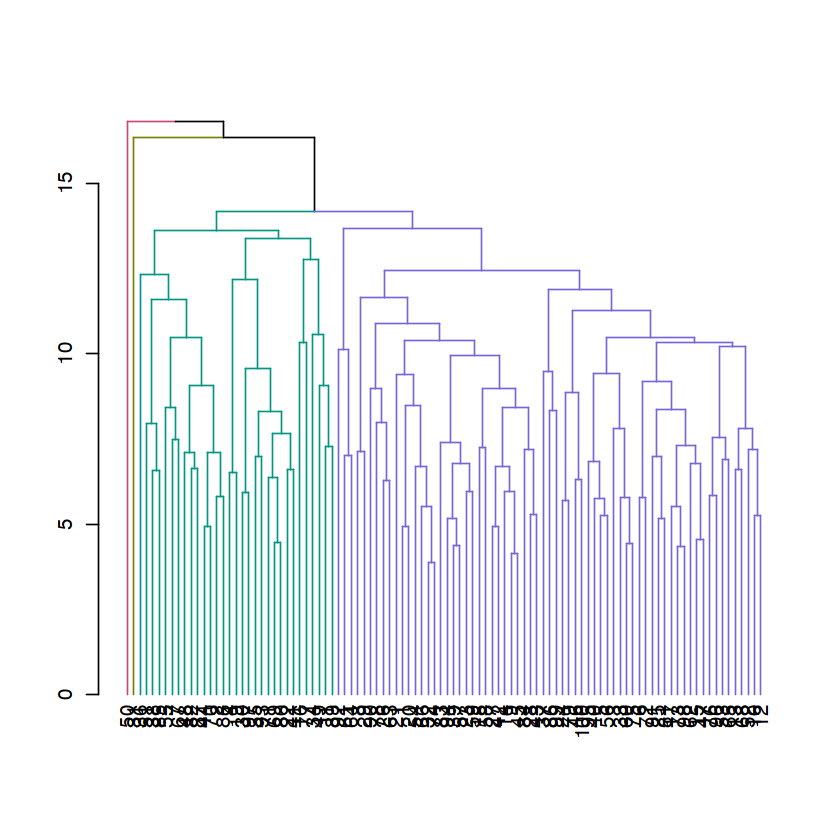

In [92]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,k=4)
plot(colored_hc_dt)

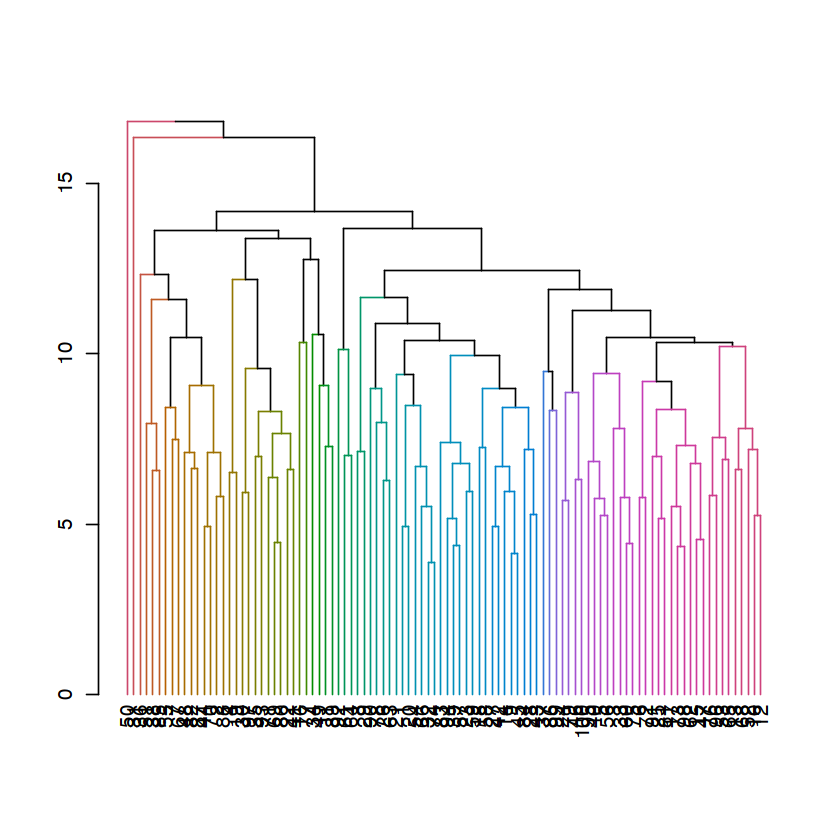

In [93]:
dend_hc_dt <- as.dendrogram(hc_dt)
colored_hc_dt <- color_branches(dend_hc_dt,h=8)
plot(colored_hc_dt)

# k平均算法（k-means clustering）
---

其实和hclust差不多，只不过kmeans得**先指定好k再聚类**  
而hclust则是**聚类完之后再取k**  
这里的k就是kmeans参数里面的centers，意味簇的个数

In [94]:
 km_dt_dummy<- kmeans(scale_dt_dummy,centers=4)
 km_dt <- scale_dt_dummy %>% 
    data.frame() %>% 
    mutate(cluster=km_dt_dummy$cluster)
head(km_dt)

,General_Health_Excellent,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very.Good,Checkup_5.or.more.years.ago,Checkup_Never,Checkup_Within.the.past.2.years,Checkup_Within.the.past.5.years,Checkup_Within.the.past.year,...,Smoking_History_No,Smoking_History_Yes,Height_.cm.,Weight_.kg.,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-1.1935804,1.1935804,-0.1063235,-0.50204436,-0.5716398,-0.1860641,1.18713209,1.0089834,-0.5075936,2
2,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,-1.1935804,1.1935804,-0.1063235,-0.68170144,-0.8066484,-0.6264526,1.18713209,0.1086795,-0.5075936,4
3,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,3.6266868,-0.1,-0.4179783,-0.1749816,-1.6785983,...,0.8294372,-0.8294372,0.7871515,0.03772005,-0.3560905,-0.6264526,1.18713209,1.0089834,-0.5075936,3
4,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,1.7699740,0.91934848,0.1483548,-0.6264526,-1.03369325,-0.7273169,-0.2658823,3
5,-0.384618,-0.2934058,-0.7955821,-0.2282658,1.3559393,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,-0.5530610,0.21777372,0.6587876,-0.6264526,-0.42801361,0.3659092,1.6678074,4
6,2.573982,-0.2934058,-0.7955821,-0.2282658,-0.7301212,-0.2729764,-0.1,-0.4179783,-0.1749816,0.5897778,...,0.8294372,-0.8294372,-0.1063235,0.21777372,0.3654010,-0.6264526,-0.02422719,-0.9202391,-0.6284492,3


如果只有x，y，最多再来个z还能做个图，特征值太多不能可视化就算咯

# 选择最好的k
---

目前为止k的选择都是姑且认为是4  
但是感觉4好像有点不对，所以得尝试不同的k值的模型

其原理是，k分得越多，模型的**total within-cluster sum of squares**（聚类中心的距离平方和最小，WCSS，i.e.方差最小）会越来越小  
但是k最多的时候也就是所有对象自成一组，那么聚类就毫无意义了  

一般而言，k在增多的时候，模型的WCSS会急剧下降直至一个拐点，之后会缓慢下降  
这个拐点就是我们要找的k

这里需要用到purrr包的map_dbl函数来测试模型的tot.withinss

In [95]:
tot_withinss <- map_dbl(1:80,  function(k){
  model <- kmeans(x = scale_dt_dummy, centers = k)
  model$tot.withinss
})
tot_withinss

[1] 4851.0000 4546.6722 4305.5198 4158.8029 3972.2758 3813.6886 3653.3698
 [8] 3488.2626 3366.9510 3225.4568 3119.8659 3002.0836 2945.3700 2808.0961
[15] 2701.2235 2629.1866 2524.7839 2365.0463 2388.9320 2250.3656 2120.4532
[22] 2112.2873 2115.0716 2023.4177 1910.1109 1923.7810 1785.9124 1754.0598
[29] 1741.7193 1670.8352 1619.2609 1567.1979 1519.6987 1472.8772 1451.1634
[36] 1438.2823 1374.6234 1310.1035 1287.6079 1264.7650 1246.2060 1224.3003
[43] 1198.7919 1136.1675 1099.9636 1052.1329 1043.9904 1026.1431  983.6448
[50]  940.2360  942.2469  893.3540  873.8503  836.9393  809.8318  782.9409
[57]  781.6571  755.9710  714.3175  698.7277  696.8439  660.8673  633.4428
[64]  605.2379  592.3917  556.8998  538.8488  519.9836  514.2752  469.4601
[71]  471.4461  463.1270  412.1103  393.8511  380.0434  360.4856  339.5353
[78]  337.7514  316.9668  281.8041

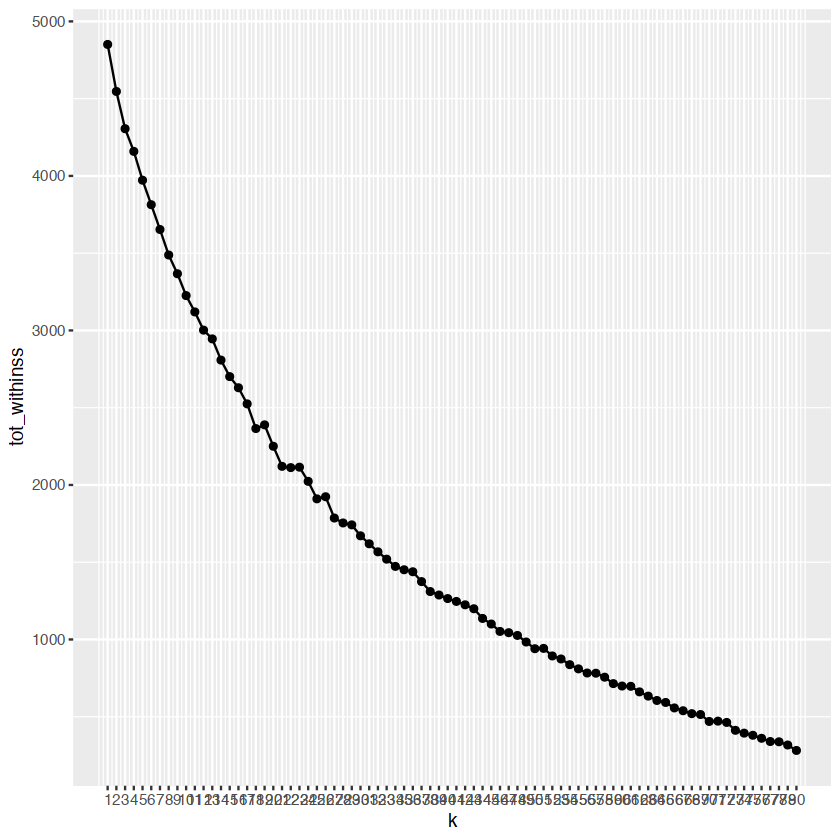

In [96]:
elbow <- data.frame(
    k=1:80,
    tot_withinss=tot_withinss
)
ggplot(elbow,aes(k,tot_withinss))+
    geom_point()+
    geom_line()+
    scale_x_continuous(breaks=1:80)

聚类结果逆天，，，  

但是大致就是这种感觉，因为这是个混合数据集，对于哑变量是不能这么聚类的  
所以看个热闹就行

换一个数据集试试，用这个brain_networks.csv

In [97]:
br_dt <- read.csv("../data/brain_networks.csv")
br_dt <- br_dt[4:nrow(br_dt),] %>% mutate_all(as.numeric)
summary(br_dt)

    network            X1                  X1.1                  X2            
 Min.   :  0.0   Min.   :-228.10130   Min.   :-203.17281   Min.   :-122.46854  
 1st Qu.:229.8   1st Qu.: -28.64557   1st Qu.: -33.57323   1st Qu.: -26.18502  
 Median :459.5   Median :   0.79593   Median :   0.16789   Median :  -0.37655  
 Mean   :459.5   Mean   :  -0.01423   Mean   :  -0.02464   Mean   :   0.00568  
 3rd Qu.:689.2   3rd Qu.:  29.26968   3rd Qu.:  34.07531   3rd Qu.:  23.39532  
 Max.   :919.0   Max.   : 163.61554   Max.   : 180.64194   Max.   : 188.27942  
      X2.1                  X3                 X3.1           
 Min.   :-113.23235   Min.   :-84.01804   Min.   :-101.68722  
 1st Qu.: -29.35663   1st Qu.:-15.42504   1st Qu.: -18.49718  
 Median :  -2.22332   Median : -1.40544   Median :  -1.58595  
 Mean   :   0.02067   Mean   :  0.00127   Mean   :   0.00589  
 3rd Qu.:  24.29352   3rd Qu.: 15.11082   3rd Qu.:  16.69877  
 Max.   : 224.82027   Max.   :131.83969   Max.   : 159.68114  

这里的nstart是迭代次数

In [106]:
br_tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = br_dt, centers = k, nstart = 50)
  model$tot.withinss
})
br_tot_withinss

[1] 152512564 103835334  94784539  88984182  84616206  81483898  79307152
 [8]  77317243  75414434  73897221

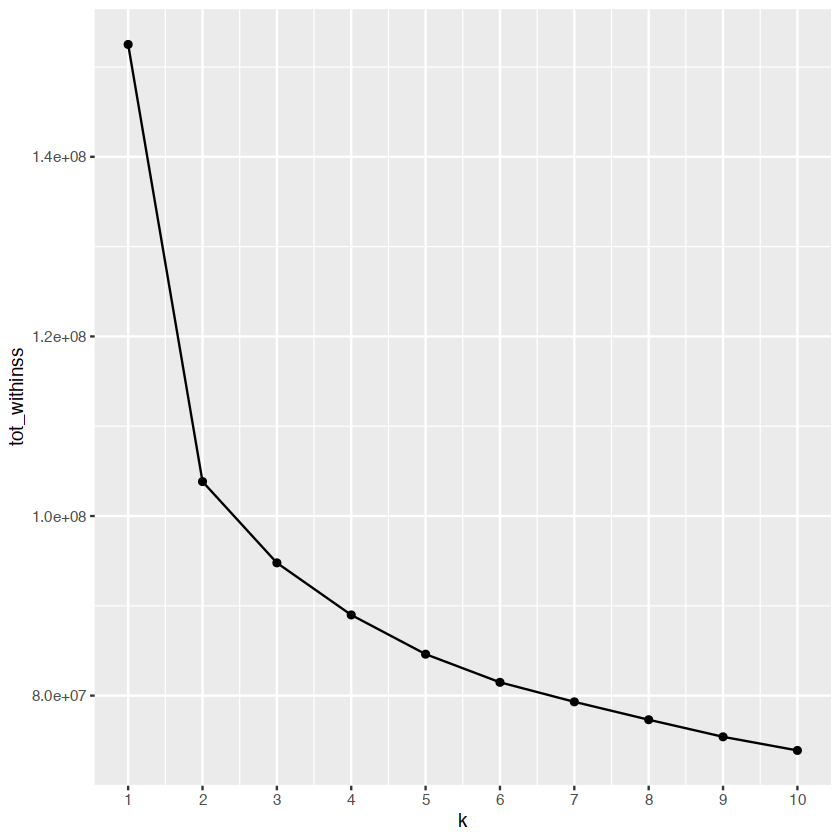

In [107]:
br_elbow <- data.frame(
    k=1:10,
    tot_withinss=br_tot_withinss
)
ggplot(br_elbow,aes(k,tot_withinss))+
    geom_point()+
    geom_line()+
    scale_x_continuous(breaks=1:10)

可以看到k=2的时候tot_withinss急剧下降，所以k选择2是最好的

# 评价聚类的好坏：轮廓分析（Silhouette analysis）
---

总共有两个指标，一个是某一个样本到同簇其他样本的平均距离C(i)，另一个是某一个样本到其他一个簇Cj的平均距离N(i)    
C(i)越小，N(i)越大，聚类越好  
综合用S(i)来判断，越趋近1说明越合理，越趋近-1则越不合理

[轮廓分析原理](https://blog.csdn.net/wangxiaopeng0329/article/details/53542606)  

In [100]:
br_pam_k2 <- pam(br_dt,k=2)

In [101]:
br_pam_k2

Medoids:
     ID network         X1      X1.1         X2         X2.1        X3
248 245     244 -0.6388885 0.2405182  1.1341981 -0.002602177  1.192622
694 691     690  0.5461654 1.6948193 -0.1011652  1.561547399 -1.257427
          X3.1          X4       X4.1         X5      X5.1         X6      X6.1
248  3.0209768  0.14096971 -0.3617192 -2.5723481  1.559537 -0.6840729 0.2586630
694 -0.7685842 -0.03473745  1.1567293 -0.5354399 -2.439116 -2.0295260 0.5841314
          X6.2       X6.3         X7       X7.1      X7.2       X7.3       X7.4
248 -0.9675379 -1.0944670 -0.2270387 -0.2758496  1.084734 -0.7252356 -2.1401088
694  1.4535327  0.7876213 -0.6510539 -1.2049723 -1.388337 -0.7381954  0.4132245
          X7.5           X8       X8.1      X8.2      X8.3       X8.4
248 -0.9035316 -0.966378093 -3.3389273 0.5162160 -1.066777 -1.1727153
694  0.8280768  0.005540922  0.2032017 0.4428419  1.163348  0.2528966
           X8.5       X9      X9.1        X10     X10.1       X11    X11.1
248 -0.092584

In [102]:
br_pam_k2$silinfo

,cluster,neighbor,sil_width
37,1,2,0.4670686
23,1,2,0.4662002
149,1,2,0.4516859
147,1,2,0.4516258
150,1,2,0.4511882
160,1,2,0.4458738
175,1,2,0.4410987
176,1,2,0.4410565
177,1,2,0.4399014
174,1,2,0.4397061


    cluster neighbor    sil_width
37        1        2  0.467068565
23        1        2  0.466200220
149       1        2  0.451685946
147       1        2  0.451625841
150       1        2  0.451188229
160       1        2  0.445873849
175       1        2  0.441098712
176       1        2  0.441056473
177       1        2  0.439901351
174       1        2  0.439706112
20        1        2  0.409810777
19        1        2  0.409347628
46        1        2  0.407794489
7         1        2  0.401773477
16        1        2  0.401124969
49        1        2  0.400657221
56        1        2  0.400163945
18        1        2  0.398563756
47        1        2  0.396313658
9         1        2  0.394120273
55        1        2  0.393586175
15        1        2  0.393321080
88        1        2  0.392101810
21        1        2  0.391496145
6         1        2  0.391367451
248       1        2  0.390408505
109       1        2  0.389442687
8         1        2  0.388719938
26        1   

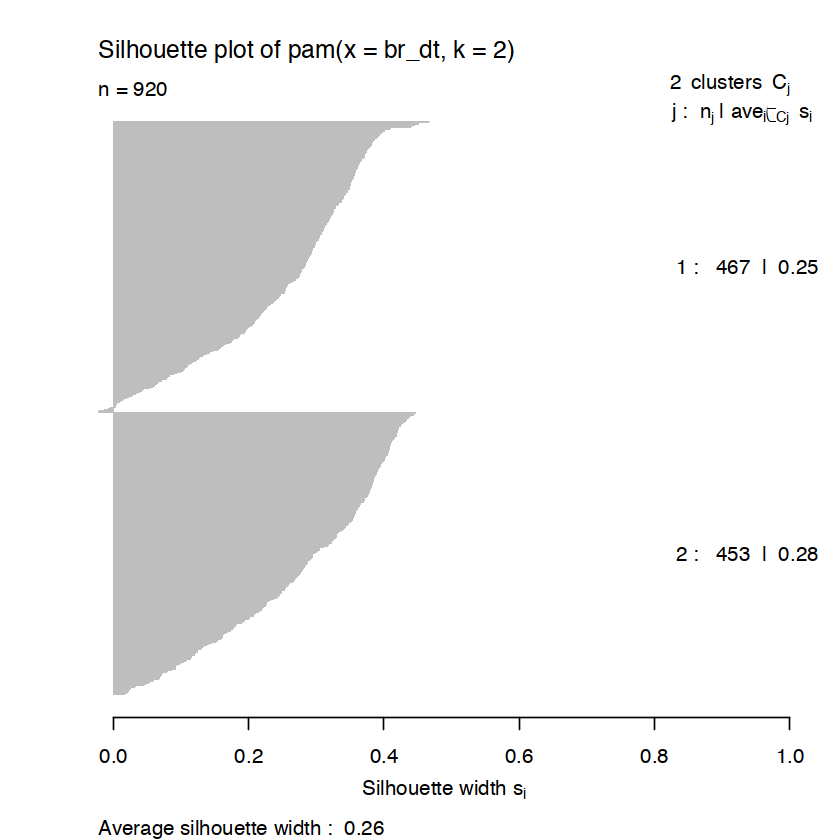

In [103]:
br_sil_plot <- silhouette(br_pam_k2)
br_sil_plot
plot(br_sil_plot)

也可以用purrr包的map_dbl来选择k  
必须从2开始，不然会报错

In [104]:
avg_width <- map_dbl(2:10,  function(k){
  model <- pam(br_dt, k = k)
  model$silinfo$avg.width
})
avg_width

[1] 0.26433540 0.14529545 0.08798337 0.09034461 0.06280243 0.06205278 0.06257817
[8] 0.05996202 0.05552624

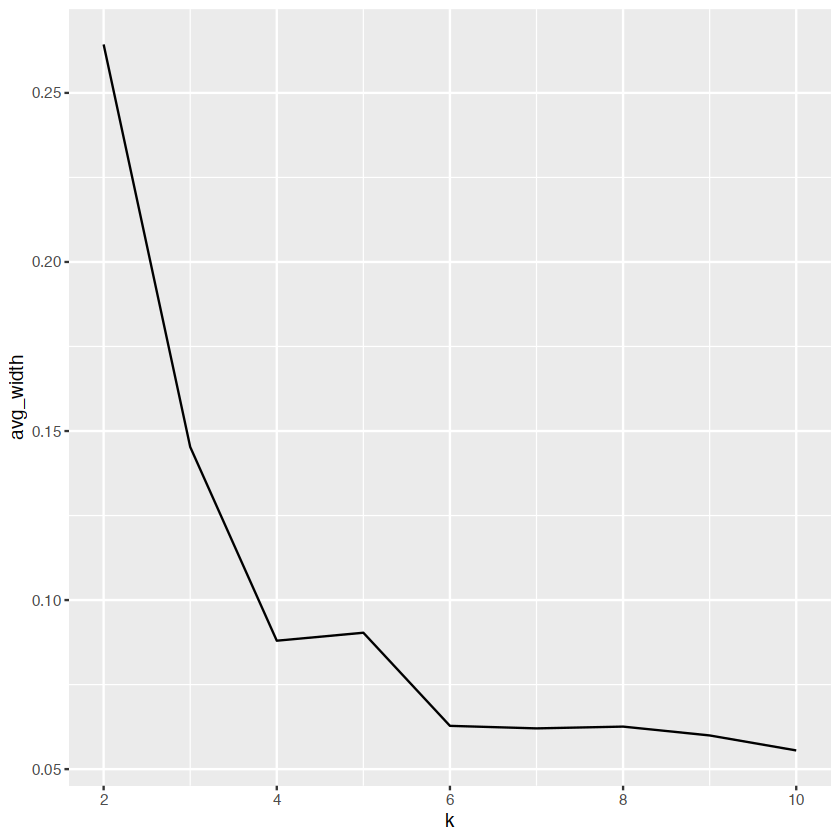

In [105]:
ggplot(data.frame(k=2:10,avg_width=avg_width),aes(k,avg_width))+geom_line()

这里可以看到k在2的时候有最高的avg_width  
所以k=2是最好的选择

# 小结
---

## 两种种聚类分析方式
hclust, kmeans  

hclust：先聚类后定簇数  
kmeans：先定簇数后聚类  

## hclust
可以直接观察结果定k  
也可以设置h来定k  

## kmeans确定k的方法
使用purrr的map_dbl函数建立数个模型  

### 以kmeans的总内部方差为基准
model$tot.withinss，拐点为基准

### 以轮廓分析的S(i)为基准
model$silinfo$avg.width，越大越好

## 注意
可能不同方法出现不同数量的簇数  
所以按照实际需求或者心情自己选一个